In [58]:
import pandas as pd
import matplotlib.pyplot as plt; plt.style.use("ggplot")

In [59]:
DATA_DIR = "data/avazu-ctr-prediction"
PLOTS_DIR = "plots"

In [60]:
df = pd.read_csv(f"../{DATA_DIR}/train.csv")

In [61]:
df_sample = df[["id", "click", "hour"]]

In [62]:
df_sample["hour"] = pd.to_datetime(df_sample["hour"], format="%y%m%d%H")
df_sample = df_sample.rename(columns={"hour": "timestamp"});

C:\Users\Praca\AppData\Local\Temp\ipykernel_11540\3394490500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample["hour"] = pd.to_datetime(df_sample["hour"], format="%y%m%d%H")


In [63]:
df_sample

,id,click,timestamp
0,1.000009e+18,0,2014-10-21 00:00:00
1,1.000017e+19,0,2014-10-21 00:00:00
2,1.000037e+19,0,2014-10-21 00:00:00
3,1.000064e+19,0,2014-10-21 00:00:00
4,1.000068e+19,0,2014-10-21 00:00:00
...,...,...,...
40428962,9.998753e+18,1,2014-10-30 23:00:00
40428963,9.999038e+18,0,2014-10-30 23:00:00
40428964,9.999585e+18,0,2014-10-30 23:00:00
40428965,9.999636e+18,1,2014-10-30 23:00:00


In [64]:
time_sample = df_sample[["click", "timestamp"]]
time_sample = time_sample.set_index("timestamp")

In [65]:
time_sample

,click
timestamp,
2014-10-21 00:00:00,0
2014-10-21 00:00:00,0
2014-10-21 00:00:00,0
2014-10-21 00:00:00,0
2014-10-21 00:00:00,0
...,...
2014-10-30 23:00:00,1
2014-10-30 23:00:00,0
2014-10-30 23:00:00,0


In [66]:
time_sample.groupby("click").head()

,click
timestamp,
2014-10-21,0
2014-10-21,0
2014-10-21,0
2014-10-21,0
2014-10-21,0
2014-10-21,1
2014-10-21,1
2014-10-21,1
2014-10-21,1


In [67]:
ctr = time_sample.groupby("timestamp").apply(lambda x: x["click"].sum() / x["click"].count())

In [68]:
ctr_df = ctr.to_frame()

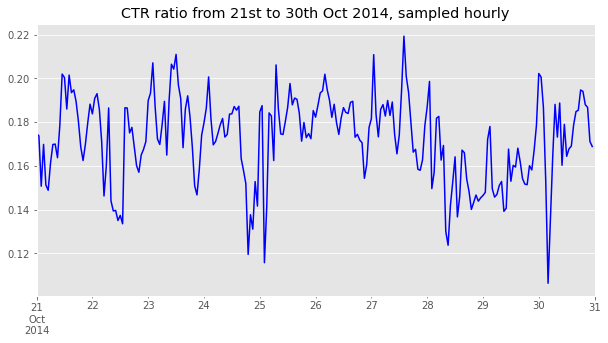

In [69]:
ctr_df.plot(color="blue", figsize=(10, 5))

plt.xlim("2014-10-21 00:00:00", "2014-10-31 00:00:00")
plt.title("CTR ratio from 21st to 30th Oct 2014, sampled hourly")
plt.legend("", frameon=False)
plt.xlabel("")
plt.savefig(f"../{PLOTS_DIR}/ctr_ratio.png")
plt.show()

In [70]:
#ctr_df.to_csv(f"../{DATA_DIR}/ctr_df.csv")